# Showcase

In [79]:
import pandas as pd
import seaborn as sns
from widgetplots import menu_plot
%config InlineBackend.figure_format = 'retina'

#wp.set_options(max_figure_width=4)
#wp.set_options(x=None, y=None, col=None, graphics=[sns.scatterplot, sns.boxplot], theme={'style': 'darkgrid', 'palette': 'colorblind'})


## Penguin data

In [80]:
data = sns.load_dataset('penguins')
data

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


## The plot widget

In [ ]:
menu_plot(data, x='species', y='body_mass_g', hue='sex', plot='boxplot',
          palette="tab10", )

Output()

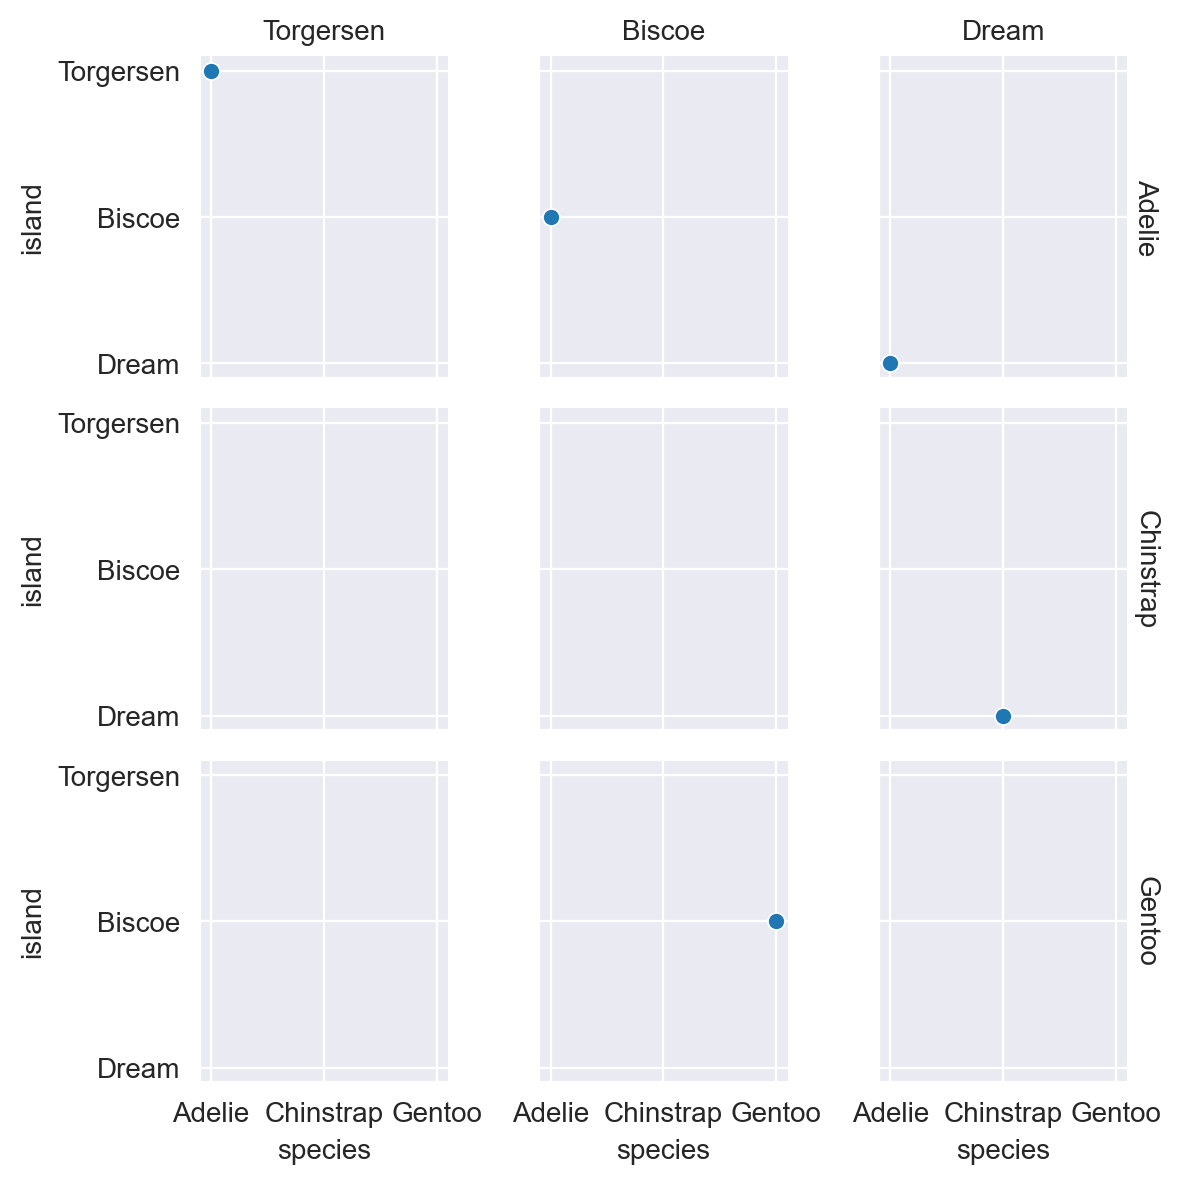

In [8]:
import seaborn as sns
sns.set_style({'style': 'darkgrid', 'palette': 'viridis'})                             
g = sns.relplot(data, x='species', y='island', col='island', row='species', height=2, kind='scatter', 
                facet_kws=dict(margin_titles=True))
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout() ;

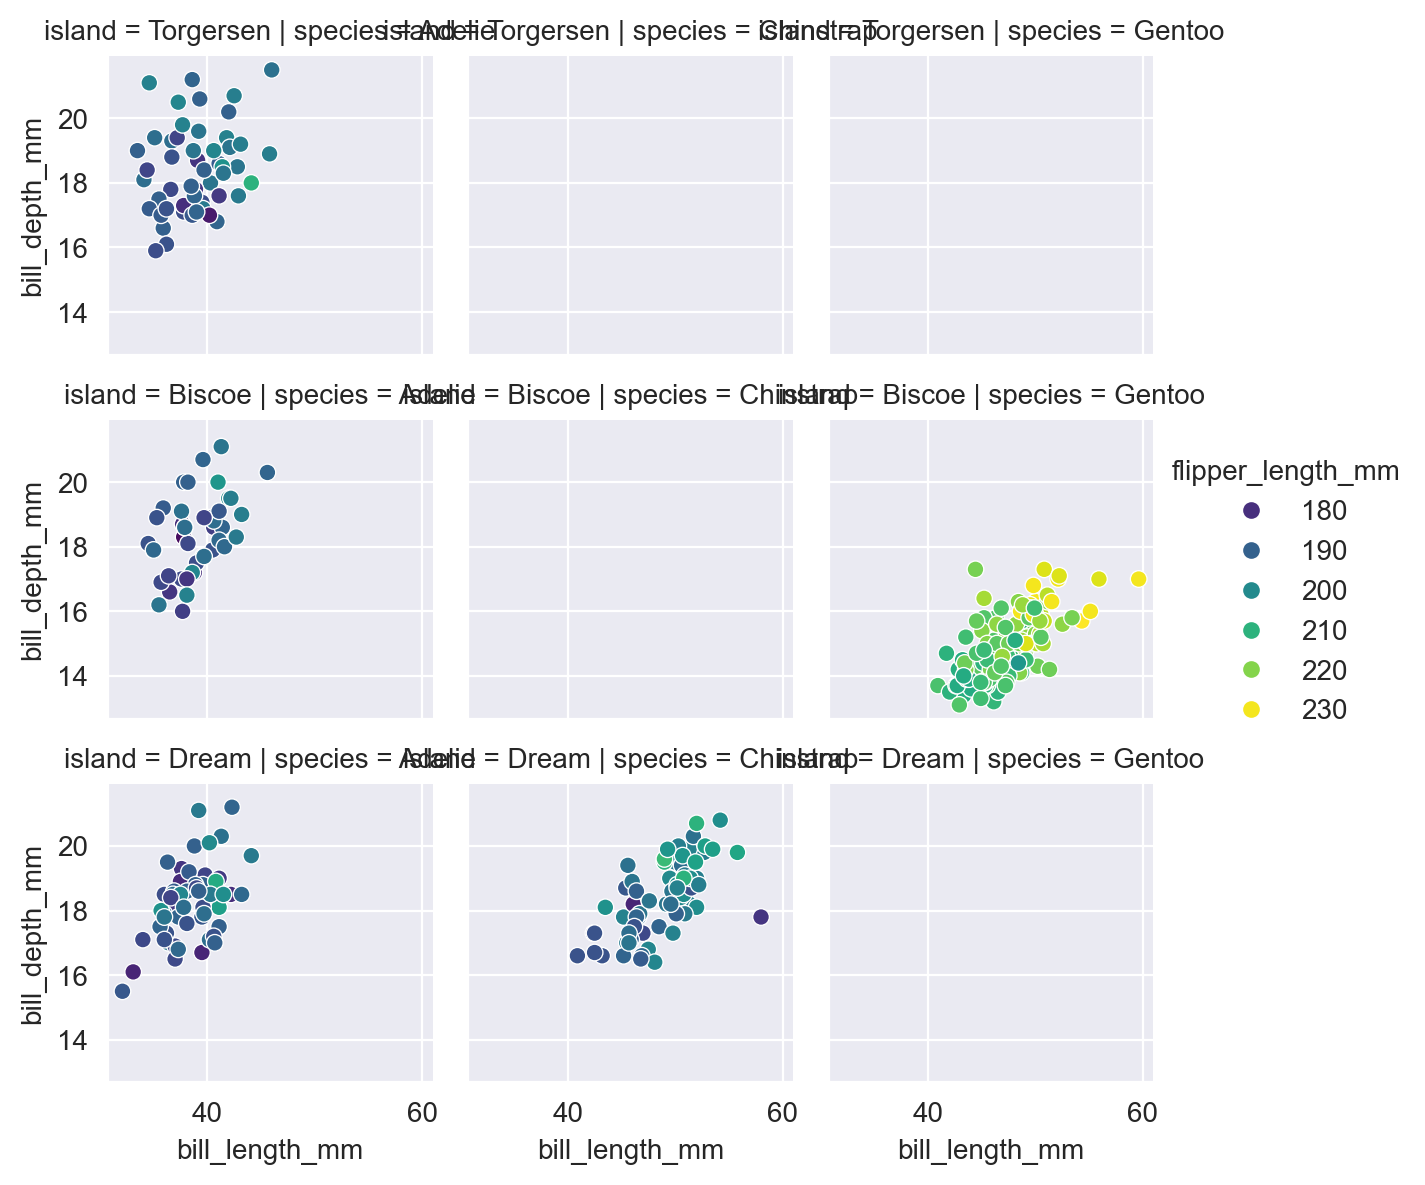

In [9]:
import seaborn as sns
sns.set_style({'style': 'darkgrid', 'palette': 'viridis'})                             
sns.relplot(data, x='bill_length_mm', y='bill_depth_mm', hue='flipper_length_mm', 
            row='island', col='species', 
            palette='viridis', kind='scatter', height=2) ;

In [10]:
menu_plot(data, x='bill_length_mm', y='body_mass_g', hue='body_mass_g', #plot='boxplot',
           col='species'
          )


Output()

In [11]:


menu_plot(data, #plot='scatterplot', 
           x='bill_length_mm', y='body_mass_g', hue='body_mass_g', col='species')

Output()

In [12]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', #plot='scatterplot', 
          # palette='colorblind'
          )

Output()

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

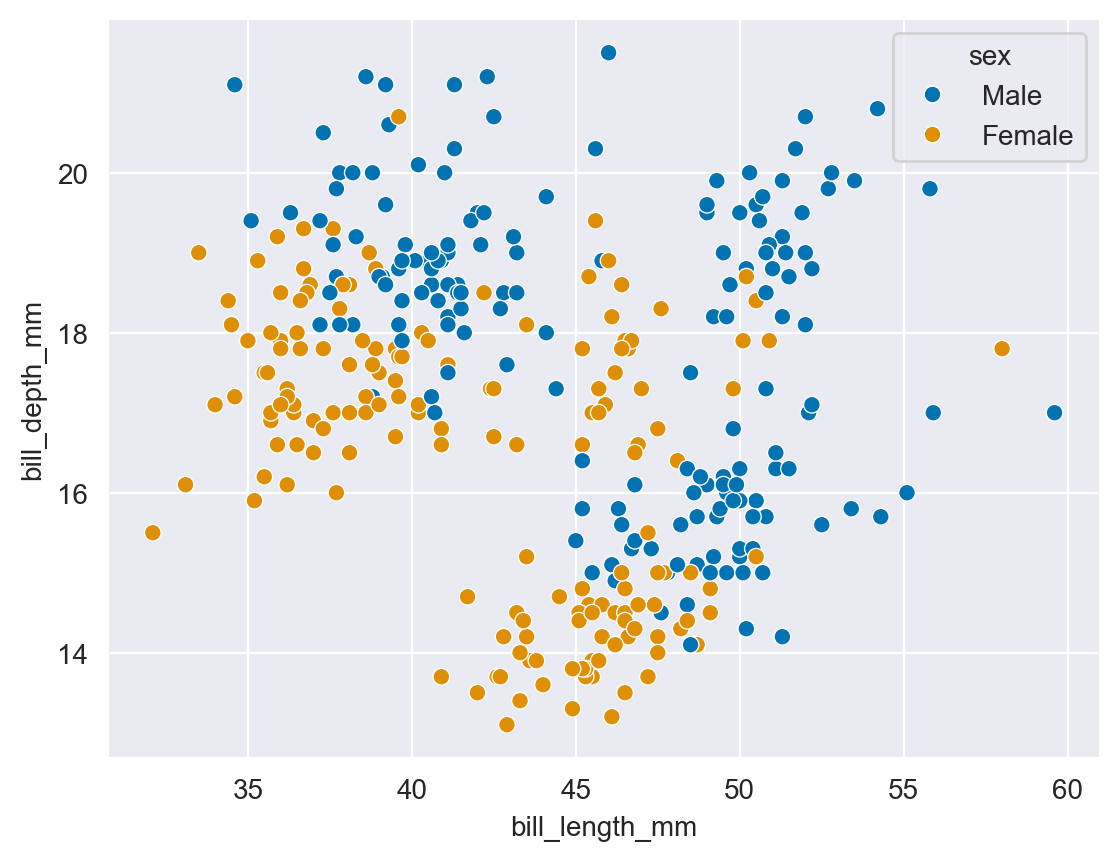

In [13]:
sns.scatterplot(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', 
              #  palette='colorblind'
               )


In [15]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', hue='body_mass_g', 
           # style='sex', 
           # size='body_mass_g', 
           col='species', row='island',
          wrap=3, theme={'palette': 'Set1'})

Output()

In [ ]:
menu_plot(data, plot='boxplot', x='species', y='bill_depth_mm')

In [ ]:
menu_plot(data, plot='histplot', x='bill_depth_mm', hue='sex', row='species', col='island')

In [ ]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', row='species', col='island')

In [ ]:
menu_plot(data=data, x='bill_length_mm', y='bill_depth_mm')

In [ ]:
menu_plot(data=data, x='bill_length_mm', y='bill_depth_mm', graphics=[sns.lmplot])

In [ ]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', hue='species', graphics=[sns.lmplot])

In [ ]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', graphics=[sns.scatterplot])

In [ ]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', hue='species', graphics=[sns.kdeplot])

In [ ]:
menu_plot(data, x='bill_length_mm', y='bill_depth_mm', hue='sex', plot='scatterplot', palette='colorblind')

In [ ]:
g = sns.FacetGrid(data, row='species', col='island', hue='sex')
g.map_dataframe(sns.regplot, x='bill_depth_mm', y='bill_length_mm')

In [ ]:






# pixi add ipydatagrid itables


In [35]:
## Read in an Excel file
import pandas as pd
data = pd.read_excel('~/Desktop/tester.xlsx')  


In [39]:
from ipydatagrid import DataGrid
import pandas as pd

# Create interactive data grid
grid = DataGrid(data, editable=True, layout={'height': '400px', 'width': '100%'})
grid

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

In [61]:
import pandas as pd
import ipydatagrid as dg
import ipywidgets as ipw

## Callbacks ##
def add_row(e):
    current_grid_df = grid.get_visible_data()
    additional_row = pd.DataFrame(
        columns = current_grid_df.columns, 
        index = [current_grid_df.index[-1] + 1],
        data = "" * len(current_grid_df.columns)
    )
    grid.data = pd.concat([current_grid_df, additional_row], ignore_index=True)

def remove_row(e):
    current_grid_df = grid.get_visible_data()
    grid.data = current_grid_df.drop(current_grid_df.tail(1).index)

## Data ##
df = pd.DataFrame(data={"Col1":range(1,11), "Col2":range(11,21)})

## Widgets ##
grid = dg.DataGrid(df, selection_mode='cell', editable=True, layout={"height":"350px"})
button_add_row = ipw.Button(description="Add Row", 
                               layout=ipw.Layout(width='100px', height='25px')                            
                            # style=ipw.ButtonStyle(button_color='darkgreen')
                            )
button_remove_row = ipw.Button(description="Remove Row", 
                               layout=ipw.Layout(width='100px', height='25px')
                            #    style=ipw.ButtonStyle(button_color='darkred')
                               )

## Handlers ##
button_add_row.on_click(add_row)
button_remove_row.on_click(remove_row)

## Layout ##
ipw.VBox([
    ipw.HBox([button_add_row, button_remove_row]),
    grid
])

In [65]:
grid.set_cell_value('Col1', 4, 99999)

True

In [72]:
import numpy as np
pd.DataFrame(np.array(grid.selected_cell_values).reshape(-1, 2), columns=['Col1', 'Col2'])

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


## Table widget

You can use the `itables` package to display interactive tables in Jupyter notebooks:


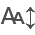

In [73]:
import itables
itables.init_notebook_mode()

In [77]:
itables.show(data, buttons=["copyHtml5", "csvHtml5", "excelHtml5"])

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


<Axes: xlabel='X', ylabel='Y'>

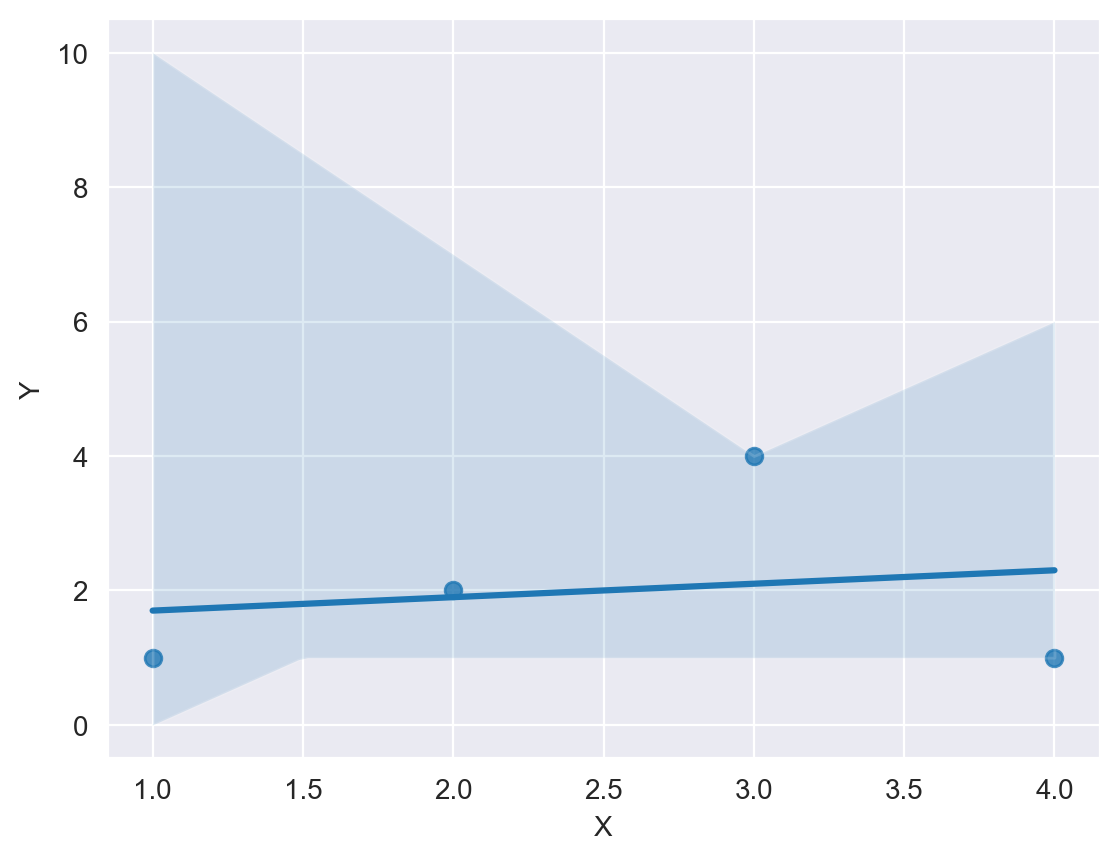

In [27]:
import seaborn as sns
sns.regplot(data, x='X', y='Y')